In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import drive
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
drive.mount("/content/drive")

reservoir_levels_df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/istanbul barajlarının doluluk oranı.xlsx")
rainfall_consumption_df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/istanbul barajlarında yağış ve istanbul günlük tüketim oranı.xlsx")



# Sütun isimlerini değiştirmeden verileri kullanalım
# Tarih sütunlarını datetime formatına dönüştürelim
rainfall_consumption_df['Tarih'] = pd.to_datetime(rainfall_consumption_df['Tarih'], errors='coerce')
reservoir_levels_df['Tarih'] = pd.to_datetime(reservoir_levels_df['Tarih'], errors='coerce')

# Verileri 'Tarih' sütununa göre birleştirelim
merged_df = pd.merge(rainfall_consumption_df, reservoir_levels_df, on='Tarih', how='inner')

# Barajların isimlerini Excel dosyasındaki orijinal halleriyle kullanacağız
dam_names_rainfall = ['Ömerli (kg/m3)', 'Darlik (kg/m3)', 'Elmali (kg/m3)', 'Terkos (kg/m3)', 'Alibey (kg/m3)',
             'B.çekmece (kg/m3)', 'Sazlidere (kg/m3)', 'Kazandere (kg/m3)', 'Pabuçdere (kg/m3)', 'ıstırancalar (kg/m3)']

dam_names_reservoir = ['Ömerli', 'Darlık', 'Elmalı', 'Terkos', 'Alibey', 'Büyükçekmece', 'Sazlıdere', 'Kazandere', 'Pabuçdere', 'Istrancalar']

# Orijinal sütun isimlerinin kontrolü
#print(rainfall_consumption_df.columns)
#print(reservoir_levels_df.columns)

# İlk birkaç satırın kontrolü
#print(rainfall_consumption_df.head())
#print(reservoir_levels_df.head())

# Veri birleştirildikten sonra birkaç satırın kontrolü
#print(merged_df.head())
#print(merged_df.tail())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Her Barajın Yağış Miktarı ile Doluluk Oranı Arasındaki Korelasyonlar:

Ömerli barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: -0.0124, p-değeri: 0.3919
Hipotez reddedilemedi: Yağış miktarı ile Ömerli barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



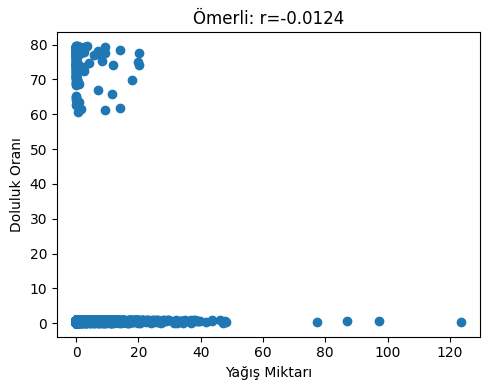

Darlık barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: -0.0186, p-değeri: 0.1970
Hipotez reddedilemedi: Yağış miktarı ile Darlık barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



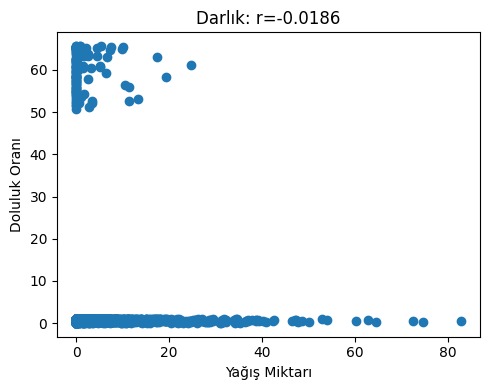

Elmalı barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: -0.0030, p-değeri: 0.8361
Hipotez reddedilemedi: Yağış miktarı ile Elmalı barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



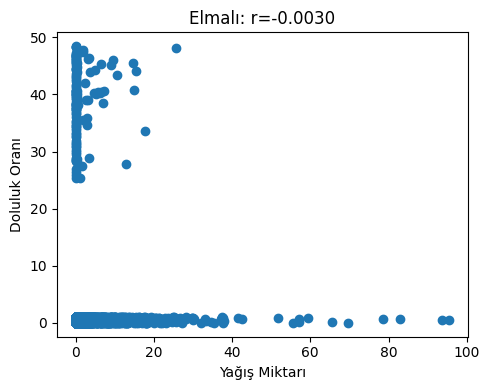

Terkos barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: -0.0024, p-değeri: 0.8692
Hipotez reddedilemedi: Yağış miktarı ile Terkos barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



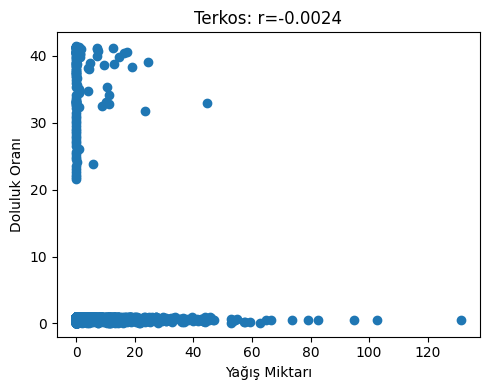

Alibey barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: -0.0172, p-değeri: 0.2327
Hipotez reddedilemedi: Yağış miktarı ile Alibey barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



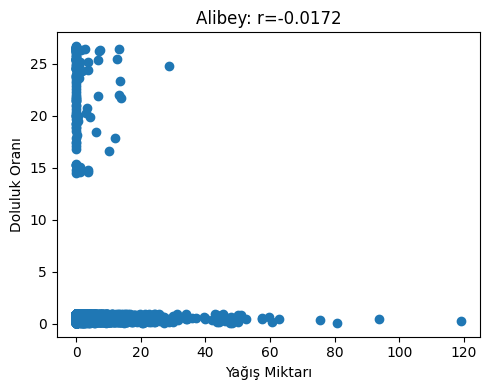

Büyükçekmece barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: 0.0015, p-değeri: 0.9192
Hipotez reddedilemedi: Yağış miktarı ile Büyükçekmece barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



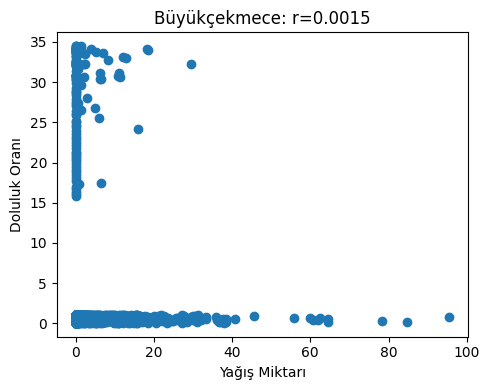

Sazlıdere barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: 0.0129, p-değeri: 0.3731
Hipotez reddedilemedi: Yağış miktarı ile Sazlıdere barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



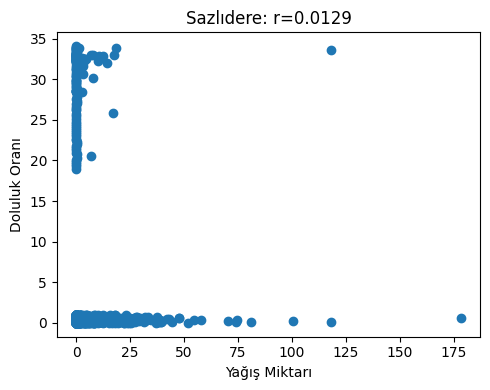

Kazandere barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: -0.0074, p-değeri: 0.6069
Hipotez reddedilemedi: Yağış miktarı ile Kazandere barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



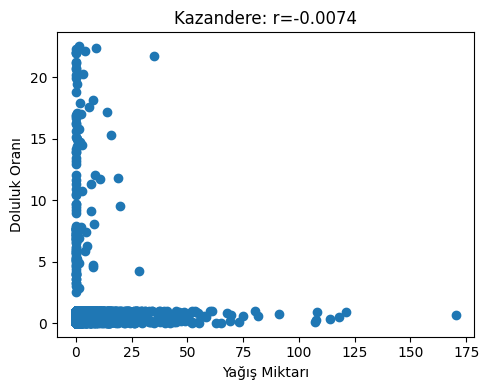

Pabuçdere barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: -0.0176, p-değeri: 0.2226
Hipotez reddedilemedi: Yağış miktarı ile Pabuçdere barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



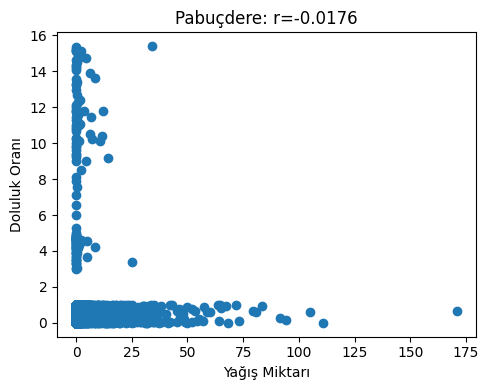

Istrancalar barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:
Korelasyon: -0.0092, p-değeri: 0.5230
Hipotez reddedilemedi: Yağış miktarı ile Istrancalar barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



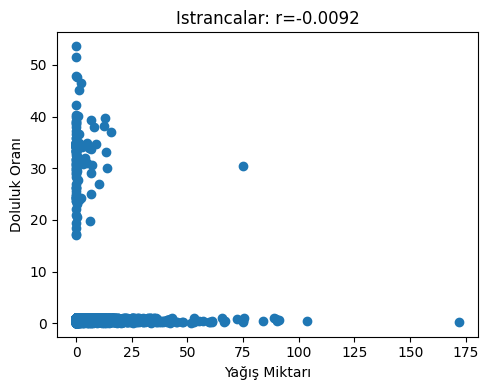

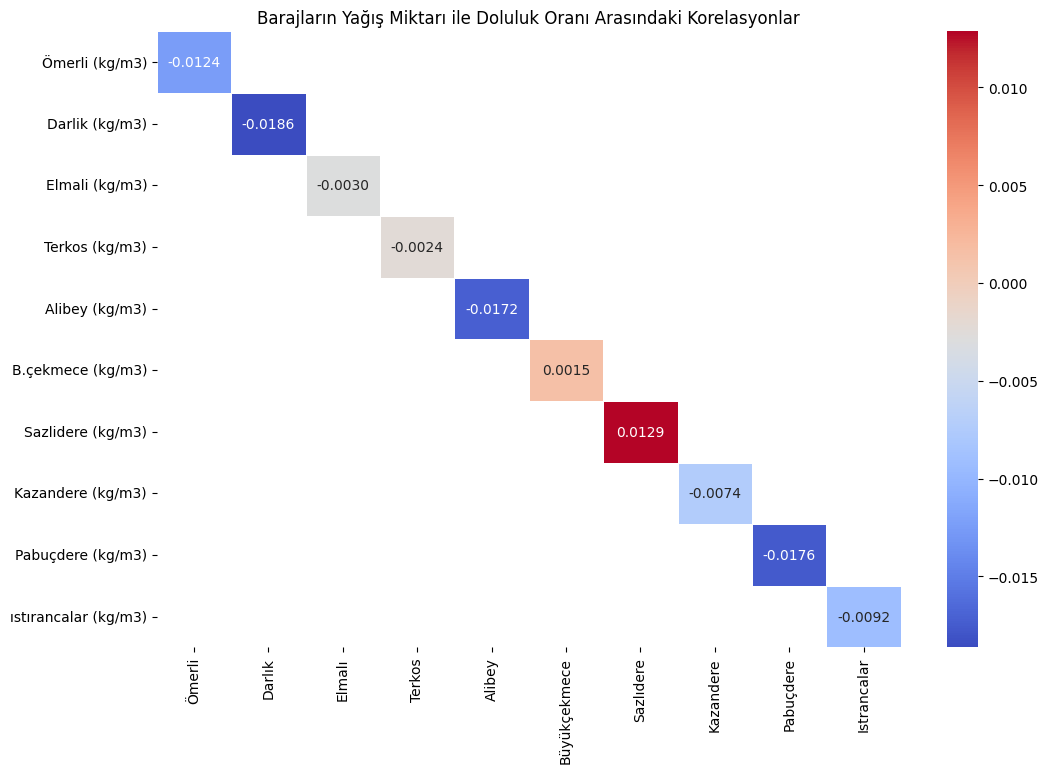

In [66]:
print("Her Barajın Yağış Miktarı ile Doluluk Oranı Arasındaki Korelasyonlar:\n")
correlation_matrix = pd.DataFrame(columns=dam_names_reservoir, index=dam_names_rainfall)
for dam in dam_names_rainfall:
    m = dam_names_rainfall.index(dam)

    # O barajın yağış miktarını alıyoruz
    rainfall = merged_df[dam]  # Yağış miktarı (barajın sütunu)

    # O barajın doluluk oranını alıyoruz
    fill_percentage = merged_df[dam_names_reservoir[m]]  # Barajın doluluk oranı (barajın doluluk oranı)

    # Pearson Korelasyonunu hesaplıyoruz
    correlation, p_value = stats.pearsonr(rainfall, fill_percentage)
    correlation_matrix.loc[dam, dam_names_reservoir[m]] = correlation
    print(f"{dam_names_reservoir[m]} barajının yağış miktarı ile doluluk oranı arasındaki korelasyon:")
    print(f"Korelasyon: {correlation:.4f}, p-değeri: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Hipotez reddedildi: Yağış miktarı ile {dam_names_reservoir[m]} barajının doluluk oranı arasında anlamlı bir ilişki vardır.\n")
    else:
        print(f"Hipotez reddedilemedi: Yağış miktarı ile {dam_names_reservoir[m]} barajının doluluk oranı arasında anlamlı bir ilişki yoktur.\n")
    plt.figure(figsize=(5,4))
    plt.scatter(rainfall, fill_percentage)
    plt.title(f"{dam_names_reservoir[m]}: r={correlation:.4f}")
    plt.xlabel("Yağış Miktarı")
    plt.ylabel("Doluluk Oranı")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)
plt.title("Barajların Yağış Miktarı ile Doluluk Oranı Arasındaki Korelasyonlar")
plt.show()


Her Barajın Doluluk Miktarı ve Günlük Tüketim için Ayrı Ayrı Korelasyonlar:
Ömerli barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.1913, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Ömerli barajının doluluk oranı arasında anlamlı bir ilişki vardır.



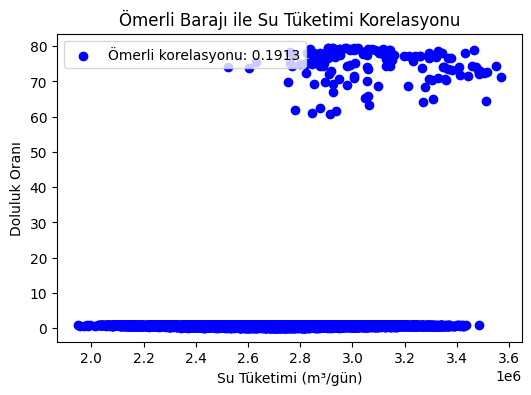

Darlık barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.1884, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Darlık barajının doluluk oranı arasında anlamlı bir ilişki vardır.



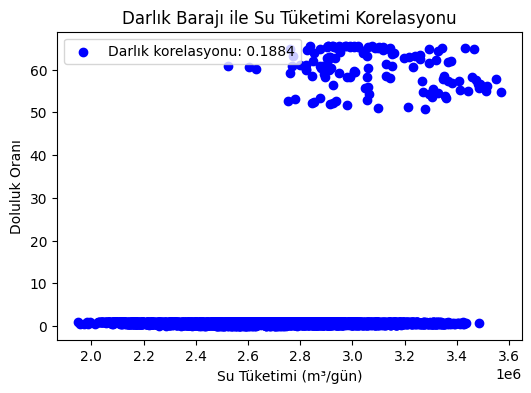

Elmalı barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.1705, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Elmalı barajının doluluk oranı arasında anlamlı bir ilişki vardır.



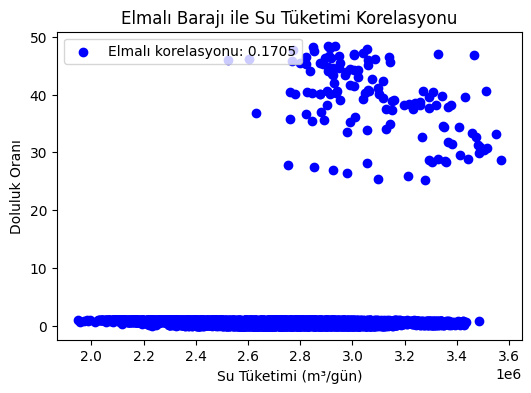

Terkos barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.1718, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Terkos barajının doluluk oranı arasında anlamlı bir ilişki vardır.



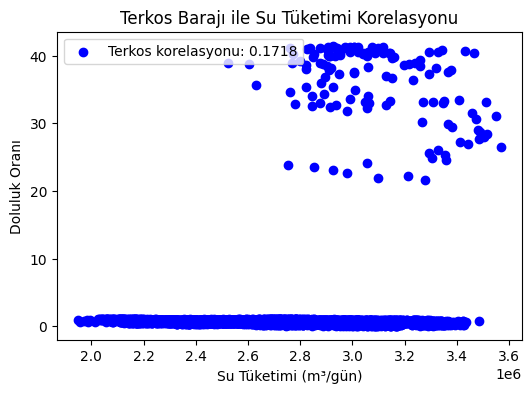

Alibey barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.1762, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Alibey barajının doluluk oranı arasında anlamlı bir ilişki vardır.



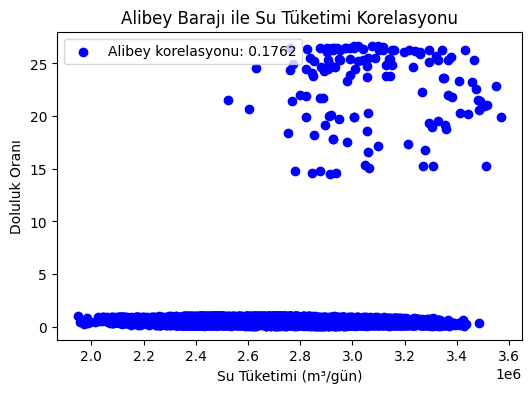

Büyükçekmece barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.1674, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Büyükçekmece barajının doluluk oranı arasında anlamlı bir ilişki vardır.



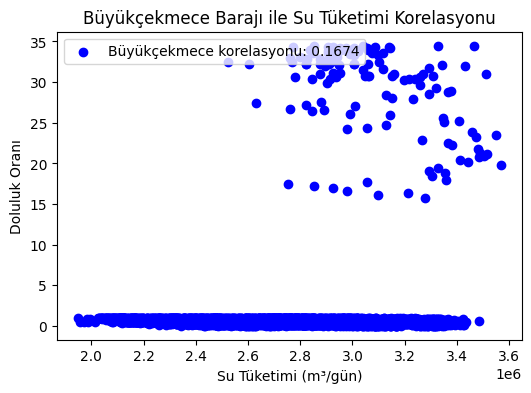

Sazlıdere barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.1658, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Sazlıdere barajının doluluk oranı arasında anlamlı bir ilişki vardır.



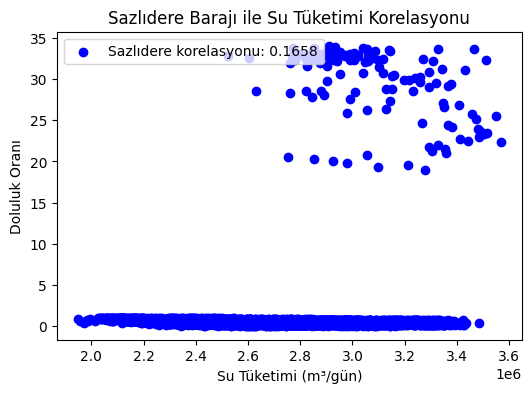

Kazandere barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.0835, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Kazandere barajının doluluk oranı arasında anlamlı bir ilişki vardır.



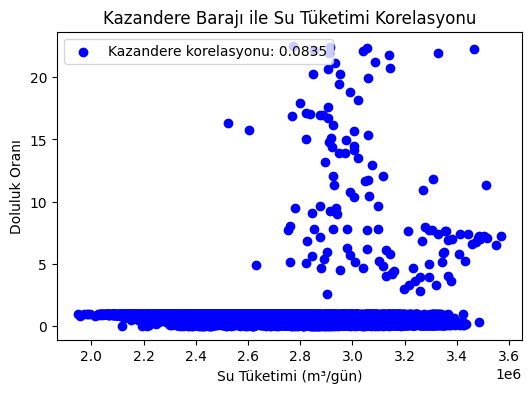

Pabuçdere barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.0528, p-değeri: 0.0003
Hipotez reddedildi: Su tüketimi ile Pabuçdere barajının doluluk oranı arasında anlamlı bir ilişki vardır.



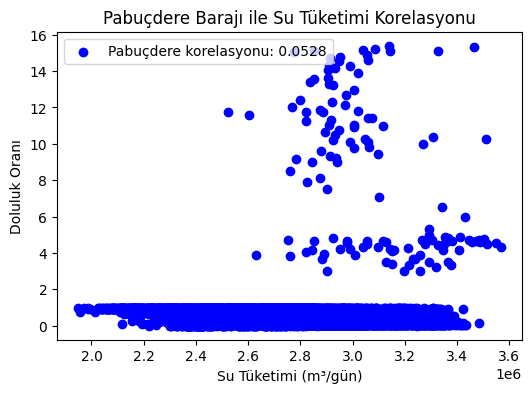

Istrancalar barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: 0.1575, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Istrancalar barajının doluluk oranı arasında anlamlı bir ilişki vardır.



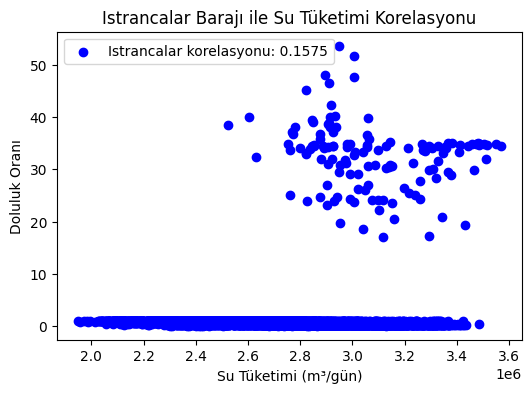

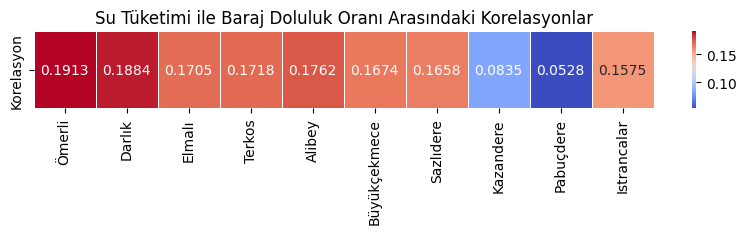

In [67]:
correlations = []
print("Her Barajın Doluluk Miktarı ve Günlük Tüketim için Ayrı Ayrı Korelasyonlar:")
for damm in dam_names_reservoir:
    x = merged_df['İstanbul günlük tüketim(m³/gün)']  # Su tüketimi
    y = merged_df[damm]  # Barajın doluluk oranı (reservoir_levels_df'deki sütunlar)
    correlation, p_value = stats.pearsonr(x, y)
    correlations.append(correlation)  # Korelasyonu listeye ekle
    print(f"{damm} barajı ile su tüketimi arasındaki korelasyon:")
    print(f"Korelasyon: {correlation:.4f}, p-değeri: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Hipotez reddedildi: Su tüketimi ile {damm} barajının doluluk oranı arasında anlamlı bir ilişki vardır.\n")
    else:
        print(f"Hipotez reddedilemedi: Su tüketimi ile {damm} barajının doluluk oranı arasında anlamlı bir ilişki yoktur.\n")

    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label=f'{damm} korelasyonu: {correlation:.4f}', color='blue')
    plt.title(f'{damm} Barajı ile Su Tüketimi Korelasyonu')
    plt.xlabel('Su Tüketimi (m³/gün)')
    plt.ylabel('Doluluk Oranı')
    plt.legend(loc='upper left')
    plt.show()
correlation_matrix = pd.DataFrame([correlations], columns=dam_names_reservoir, index=["Korelasyon"])

# Isı haritası ile görselleştirme
plt.figure(figsize=(10, 1))  # Grafiğin boyutunu ayarla
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, linewidths=0.5)
plt.title('Su Tüketimi ile Baraj Doluluk Oranı Arasındaki Korelasyonlar')
plt.show()

Her Barajın Yağış Miktarı ve Günlük Tüketim için Ayrı Ayrı Korelasyonlar:
Ömerli (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0782, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Ömerli (kg/m3) barajı arasında anlamlı bir ilişki vardır.



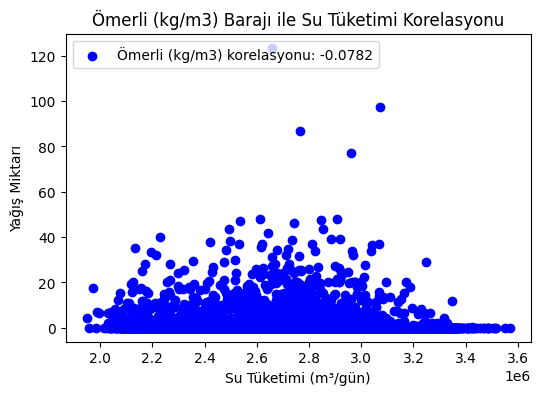

Darlik (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0926, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Darlik (kg/m3) barajı arasında anlamlı bir ilişki vardır.



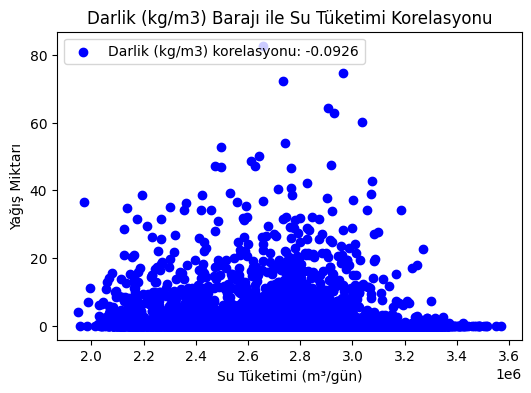

Elmali (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0806, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Elmali (kg/m3) barajı arasında anlamlı bir ilişki vardır.



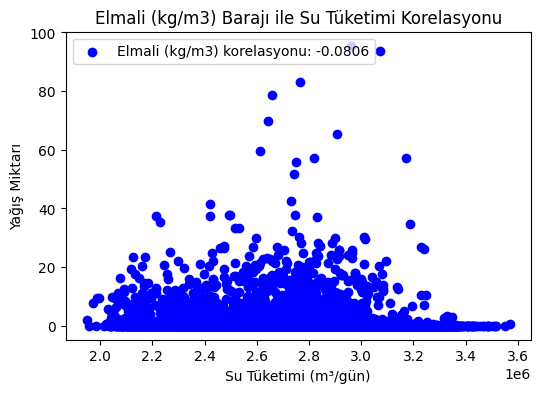

Terkos (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0959, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Terkos (kg/m3) barajı arasında anlamlı bir ilişki vardır.



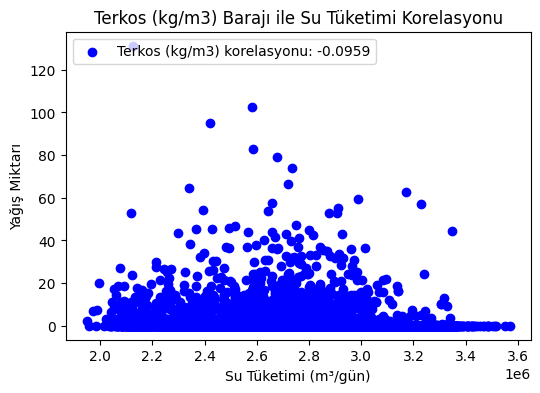

Alibey (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0953, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Alibey (kg/m3) barajı arasında anlamlı bir ilişki vardır.



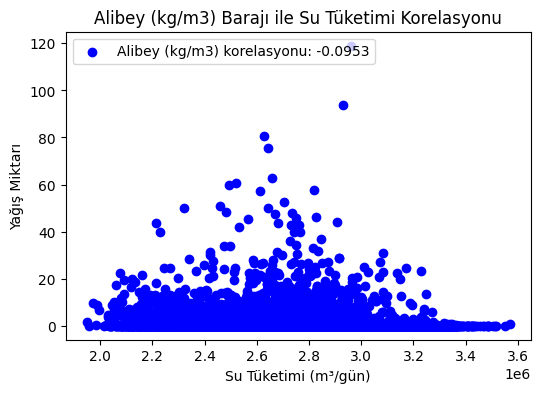

B.çekmece (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0790, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile B.çekmece (kg/m3) barajı arasında anlamlı bir ilişki vardır.



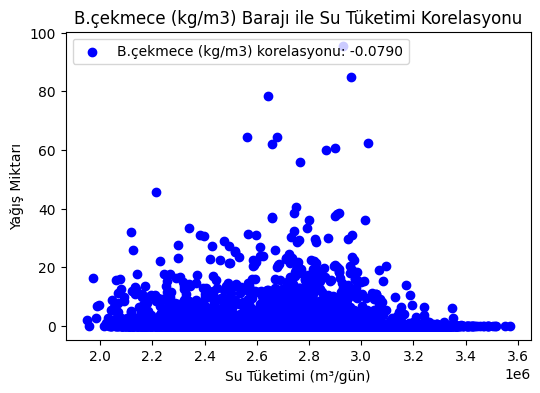

Sazlidere (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0590, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Sazlidere (kg/m3) barajı arasında anlamlı bir ilişki vardır.



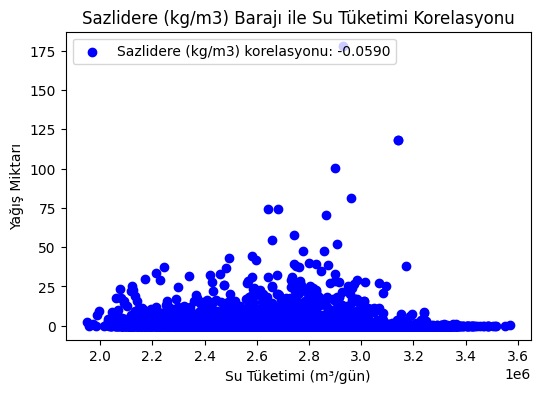

Kazandere (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0855, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Kazandere (kg/m3) barajı arasında anlamlı bir ilişki vardır.



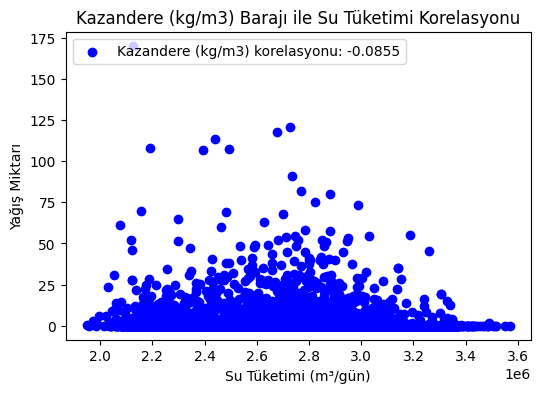

Pabuçdere (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.1063, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile Pabuçdere (kg/m3) barajı arasında anlamlı bir ilişki vardır.



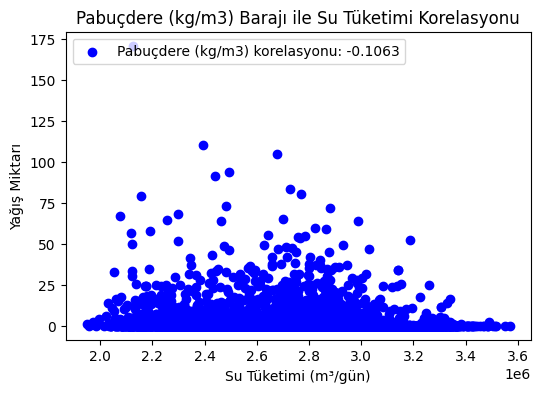

ıstırancalar (kg/m3) barajı ile su tüketimi arasındaki korelasyon:
Korelasyon: -0.0953, p-değeri: 0.0000
Hipotez reddedildi: Su tüketimi ile ıstırancalar (kg/m3) barajı arasında anlamlı bir ilişki vardır.



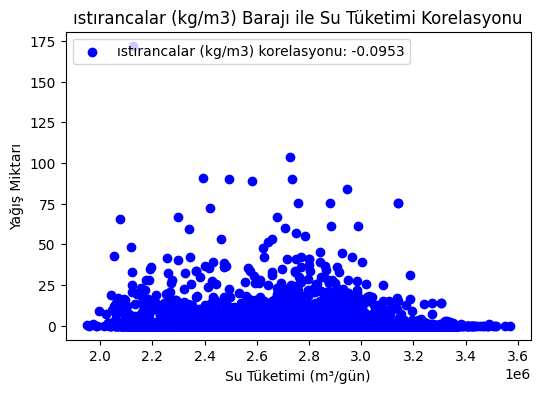

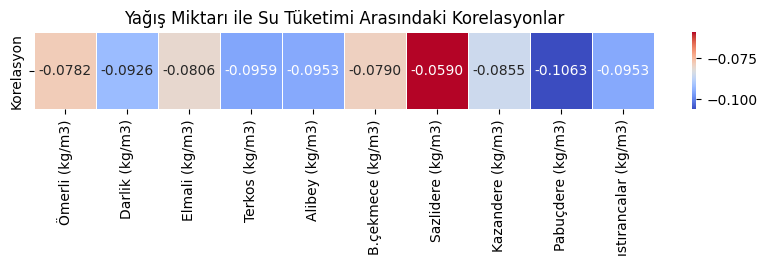

In [68]:
correlations = []
print("Her Barajın Yağış Miktarı ve Günlük Tüketim için Ayrı Ayrı Korelasyonlar:")
for dam in dam_names_rainfall:
    x = merged_df['İstanbul günlük tüketim(m³/gün)']  # Su tüketimi
    y = merged_df[dam]  # Barajın doluluk oranı
    correlation, p_value = stats.pearsonr(x, y)
    correlations.append(correlation)  # Korelasyonu listeye ekle
    print(f"{dam} barajı ile su tüketimi arasındaki korelasyon:")
    print(f"Korelasyon: {correlation:.4f}, p-değeri: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Hipotez reddedildi: Su tüketimi ile {dam} barajı arasında anlamlı bir ilişki vardır.\n")
    else:
        print(f"Hipotez reddedilemedi: Su tüketimi ile {dam} barajı arasında anlamlı bir ilişki yoktur.\n")

    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label=f'{dam} korelasyonu: {correlation:.4f}', color='blue')
    plt.title(f'{dam} Barajı ile Su Tüketimi Korelasyonu')
    plt.xlabel('Su Tüketimi (m³/gün)')
    plt.ylabel('Yağış Miktarı')
    plt.legend(loc='upper left')
    plt.show()
correlation_matrix = pd.DataFrame([correlations], columns=dam_names_rainfall, index=["Korelasyon"])

# Isı haritası ile görselleştirme
plt.figure(figsize=(10, 1))  # Grafiğin boyutunu ayarla
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, linewidths=0.5)
plt.title('Yağış Miktarı ile Su Tüketimi Arasındaki Korelasyonlar')
plt.show()


Toplam Yağış ile Su Tüketimi Arasındaki Korelasyon:
Korelasyon: -0.1108, p-değeri: 0.0000
Hipotez reddedildi: Toplam yağış ile su tüketimi arasında anlamlı bir ilişki vardır.



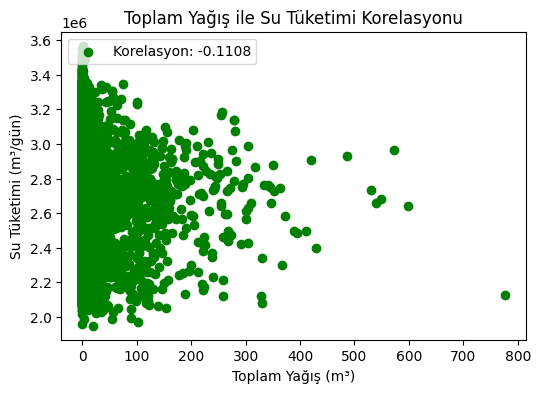

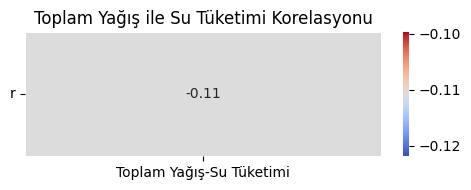

In [69]:
print("\nToplam Yağış ile Su Tüketimi Arasındaki Korelasyon:")
correlations = []
# Toplam yağışı her barajın yağış verilerini toplayarak hesaplıyoruz
total_rainfall = merged_df[dam_names_rainfall].sum(axis=1)  # Her gün için toplam yağış
total_consumption = merged_df['İstanbul günlük tüketim(m³/gün)']  # Su tüketimi

# Toplam yağış ile toplam su tüketimi arasındaki Pearson korelasyon testi
correlation_total_rainfall, p_value_total_rainfall = stats.pearsonr(total_rainfall, total_consumption)
correlations.append(correlation_total_rainfall)
print(f"Korelasyon: {correlation_total_rainfall:.4f}, p-değeri: {p_value_total_rainfall:.4f}")
if p_value_total_rainfall < 0.05:
    print(f"Hipotez reddedildi: Toplam yağış ile su tüketimi arasında anlamlı bir ilişki vardır.\n")
else:
    print(f"Hipotez reddedilemedi: Toplam yağış ile su tüketimi arasında anlamlı bir ilişki yoktur.\n")
plt.figure(figsize=(6, 4))
plt.scatter(total_rainfall, total_consumption, label=f'Korelasyon: {correlation_total_rainfall:.4f}', color='green')
plt.title('Toplam Yağış ile Su Tüketimi Korelasyonu')
plt.xlabel('Toplam Yağış (m³)')
plt.ylabel('Su Tüketimi (m³/gün)')
plt.legend(loc='upper left')
plt.show()
correlation_matrix = pd.DataFrame([correlations], columns=['Toplam Yağış-Su Tüketimi'], index=["r"])

# Heatmap görselleştirmesi
plt.figure(figsize=(5, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Toplam Yağış ile Su Tüketimi Korelasyonu")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Toplam Yağış ile Her Barajın Doluluk Oranı Arasındaki Korelasyonlar:
Ömerli barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0120, p-değeri: 0.4058
Hipotez reddedilemedi: Toplam yağış ile Ömerli barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



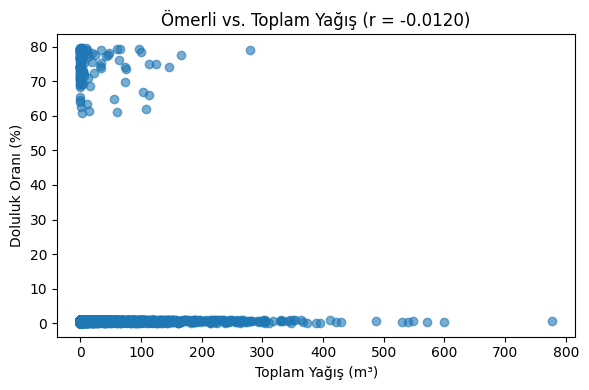

Darlık barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0119, p-değeri: 0.4105
Hipotez reddedilemedi: Toplam yağış ile Darlık barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



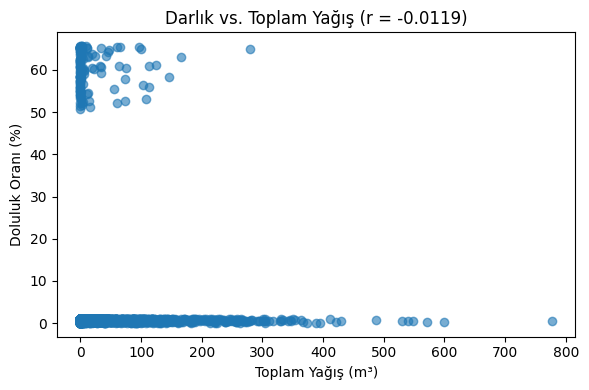

Elmalı barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0076, p-değeri: 0.5966
Hipotez reddedilemedi: Toplam yağış ile Elmalı barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



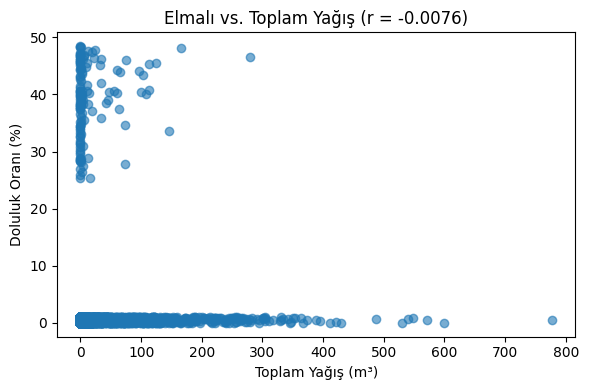

Terkos barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0113, p-değeri: 0.4329
Hipotez reddedilemedi: Toplam yağış ile Terkos barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



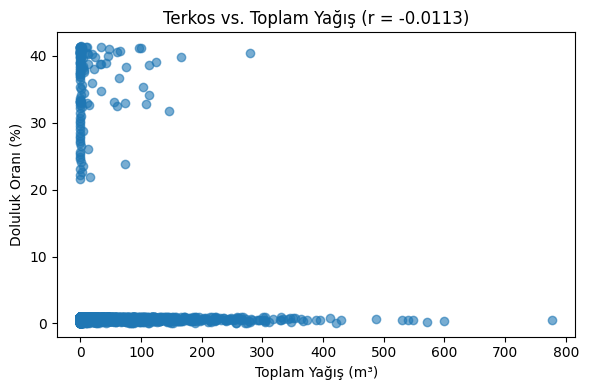

Alibey barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0144, p-değeri: 0.3176
Hipotez reddedilemedi: Toplam yağış ile Alibey barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



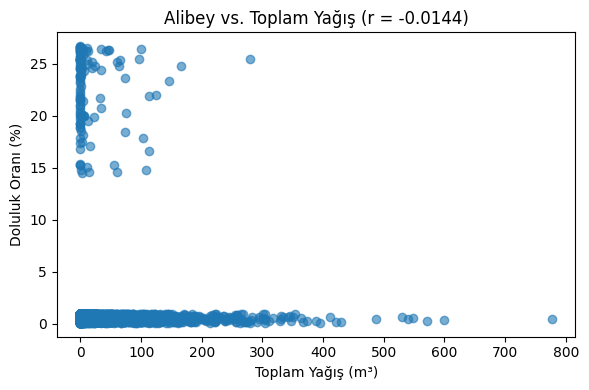

Büyükçekmece barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0111, p-değeri: 0.4424
Hipotez reddedilemedi: Toplam yağış ile Büyükçekmece barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



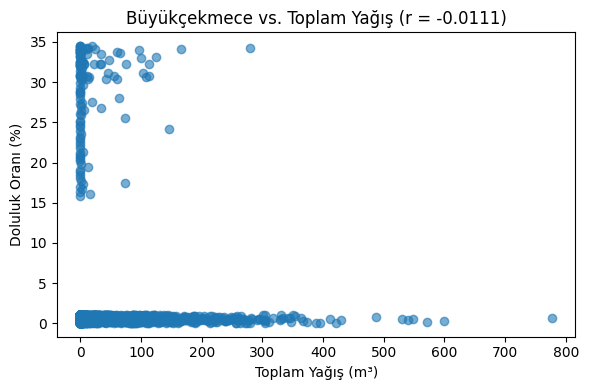

Sazlıdere barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0109, p-değeri: 0.4523
Hipotez reddedilemedi: Toplam yağış ile Sazlıdere barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



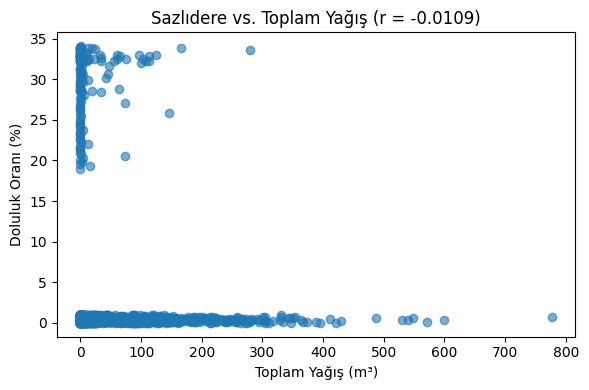

Kazandere barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0034, p-değeri: 0.8133
Hipotez reddedilemedi: Toplam yağış ile Kazandere barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



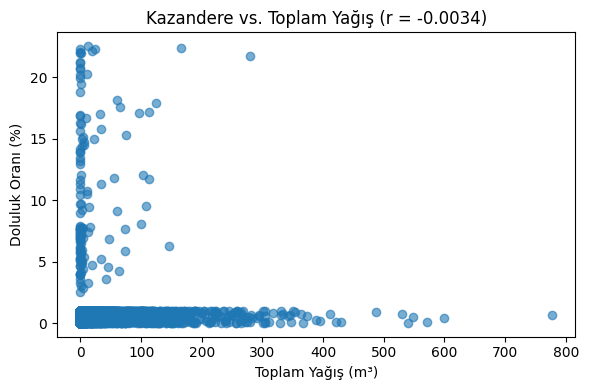

Pabuçdere barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0076, p-değeri: 0.5968
Hipotez reddedilemedi: Toplam yağış ile Pabuçdere barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



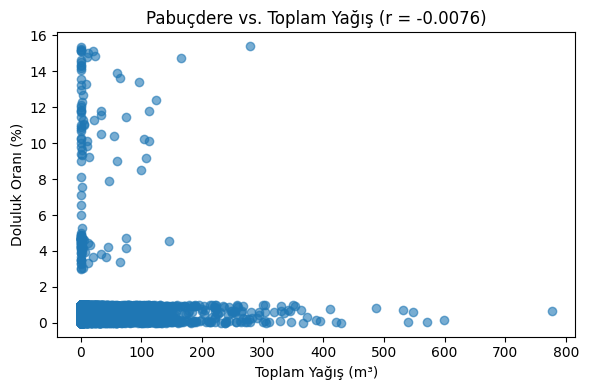

Istrancalar barajı ile toplam yağış arasındaki korelasyon:
Korelasyon: -0.0081, p-değeri: 0.5746
Hipotez reddedilemedi: Toplam yağış ile Istrancalar barajının doluluk oranı arasında anlamlı bir ilişki yoktur.



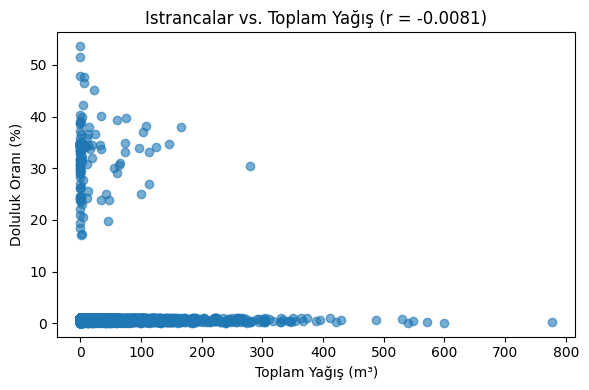

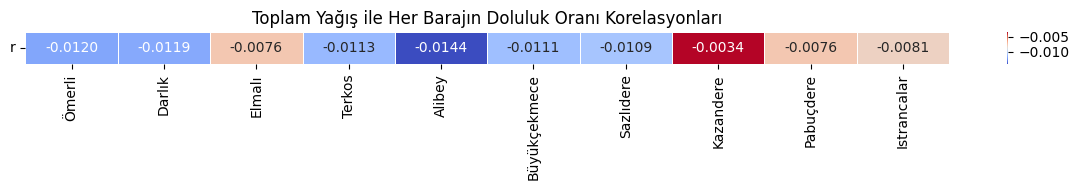

In [70]:
print("Toplam Yağış ile Her Barajın Doluluk Oranı Arasındaki Korelasyonlar:")
correlations = []
for damm in dam_names_reservoir:
    # O gün için toplam yağış ile barajın doluluk oranını alıyoruz
    y = merged_df[damm]  # Barajın doluluk oranı
    correlation, p_value = stats.pearsonr(total_rainfall, y)
    correlations.append(correlation)
    print(f"{damm} barajı ile toplam yağış arasındaki korelasyon:")
    print(f"Korelasyon: {correlation:.4f}, p-değeri: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Hipotez reddedildi: Toplam yağış ile {damm} barajının doluluk oranı arasında anlamlı bir ilişki vardır.\n")
    else:
        print(f"Hipotez reddedilemedi: Toplam yağış ile {damm} barajının doluluk oranı arasında anlamlı bir ilişki yoktur.\n")
    plt.figure(figsize=(6, 4))
    plt.scatter(total_rainfall, y, alpha=0.6)
    plt.title(f"{damm} vs. Toplam Yağış (r = {correlation:.4f})")
    plt.xlabel("Toplam Yağış (m³)")
    plt.ylabel("Doluluk Oranı (%)")
    plt.tight_layout()
    plt.show()
correlation_matrix = pd.DataFrame([correlations], columns=dam_names_reservoir, index=["r"])

# Heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', cbar=True, linewidths=0.5)
plt.title("Toplam Yağış ile Her Barajın Doluluk Oranı Korelasyonları")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

LinearRegression RMSE: 156433.77888263832
LinearRegression R^2:   0.7290646123237092
RandomForest   RMSE: 73280.84360728224
RandomForest   R^2:   0.9405453836668665


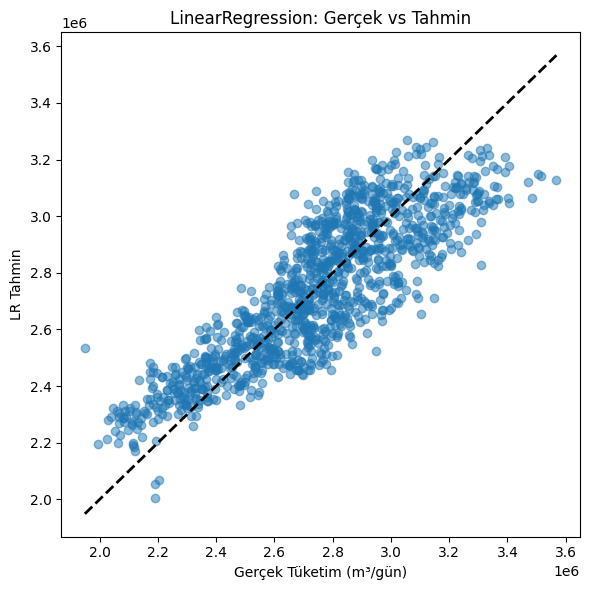

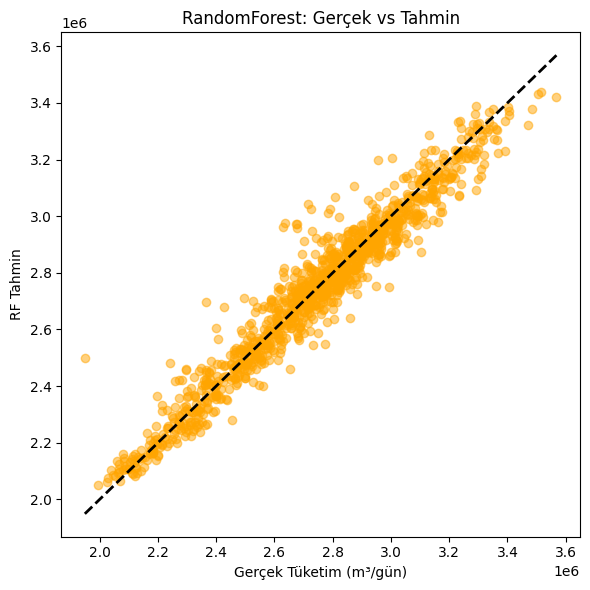

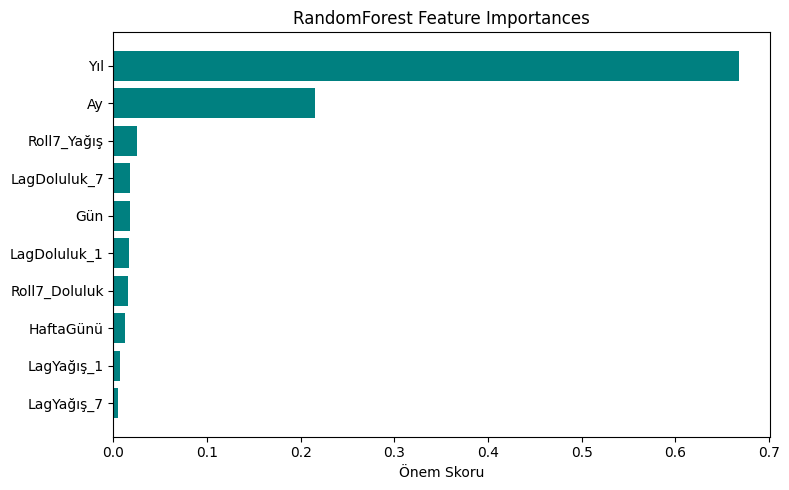

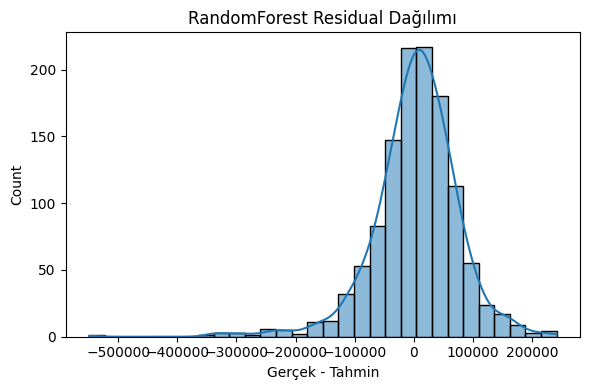

In [71]:
# Machine Learning Part
# -------- ÖZELLİK MÜHENDİSLİĞİ --------
# Zaman bileşenleri ekleyelim
merged_df['Yıl']  = merged_df['Tarih'].dt.year
merged_df['Ay']   = merged_df['Tarih'].dt.month
merged_df['Gün']  = merged_df['Tarih'].dt.day
merged_df['HaftaGünü'] = merged_df['Tarih'].dt.weekday

# Lag ve hareketli ortalama
for lag in [1,7]:
    merged_df[f'LagYağış_{lag}'] = merged_df[dam_names_rainfall].sum(axis=1).shift(lag)
    merged_df[f'LagDoluluk_{lag}'] = merged_df[dam_names_reservoir].mean(axis=1).shift(lag)

merged_df['Roll7_Yağış']   = merged_df[dam_names_rainfall].sum(axis=1).rolling(window=7).mean()
merged_df['Roll7_Doluluk'] = merged_df[dam_names_reservoir].mean(axis=1).rolling(window=7).mean()

# Hedef: Ertesi gün İstanbul su tüketimi
merged_df['Tüketim_Ertesi'] = merged_df['İstanbul günlük tüketim(m³/gün)'].shift(-1)

# NaN içeren satırları atalım
ml_df = merged_df.dropna(subset=['Tüketim_Ertesi'])

# Özellik ve hedef matrisleri
X = ml_df[['Yıl','Ay','Gün','HaftaGünü','Roll7_Yağış','Roll7_Doluluk','LagYağış_1','LagYağış_7','LagDoluluk_1','LagDoluluk_7']]
y = ml_df['Tüketim_Ertesi']

# Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Özellik isimleri
feature_cols = [
    'Yıl','Ay','Gün','HaftaGünü',
    'Roll7_Yağış','Roll7_Doluluk',
    'LagYağış_1','LagYağış_7',
    'LagDoluluk_1','LagDoluluk_7'
]

# Hem hedefi hem de tüm özellikleri NaN içermeyen satırları al
ml_df = merged_df.dropna(subset=['Tüketim_Ertesi'] + feature_cols)

# Şimdi X, y oluştur ve split uygula
X = ml_df[feature_cols]
y = ml_df['Tüketim_Ertesi']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Basit lineer regresyon
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Performans değerlendirme
print("LinearRegression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr))) #root mean sqaured error
print("LinearRegression R^2:  ", r2_score(y_test, y_pred_lr)) #coefficient of determination
print("RandomForest   RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RandomForest   R^2:  ", r2_score(y_test, y_pred_rf))

# Görselleştirmeler
# 1) Gerçek vs Tahmin (LinearRegression)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
lims = [min(y_test.min(), y_pred_lr.min()), max(y_test.max(), y_pred_lr.max())]
plt.plot(lims, lims, 'k--', lw=2)
plt.xlabel('Gerçek Tüketim (m³/gün)')
plt.ylabel('LR Tahmin')
plt.title('LinearRegression: Gerçek vs Tahmin')
plt.tight_layout()
plt.show()

# 2) Gerçek vs Tahmin (RandomForest)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='orange')
lims = [min(y_test.min(), y_pred_rf.min()), max(y_test.max(), y_pred_rf.max())]
plt.plot(lims, lims, 'k--', lw=2)
plt.xlabel('Gerçek Tüketim (m³/gün)')
plt.ylabel('RF Tahmin')
plt.title('RandomForest: Gerçek vs Tahmin')
plt.tight_layout()
plt.show()

# 3) Feature Importances (RandomForest)
importances = rf.feature_importances_
indices     = np.argsort(importances)

plt.figure(figsize=(8,5))
plt.barh(
    np.array(feature_cols)[indices],
    importances[indices],
    color='teal'
)
plt.xlabel('Önem Skoru')
plt.title('RandomForest Feature Importances')
plt.tight_layout()
plt.show()

# 4) Residual Distribution (RandomForest)
residuals = y_test - y_pred_rf
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Gerçek - Tahmin')
plt.title('RandomForest Residual Dağılımı')
plt.tight_layout()
plt.show()

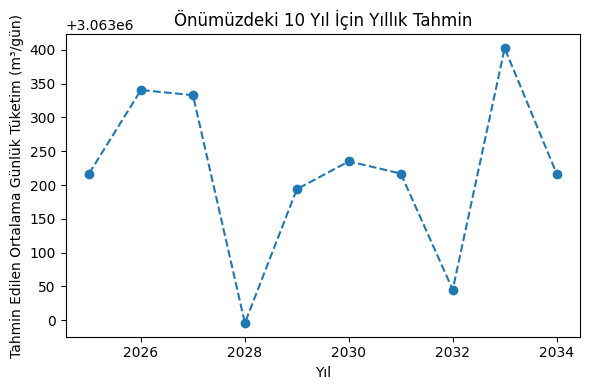

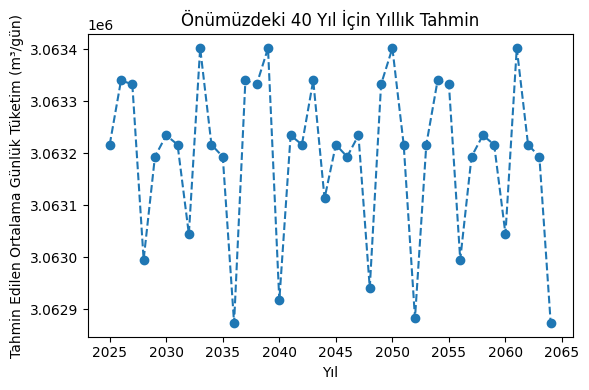

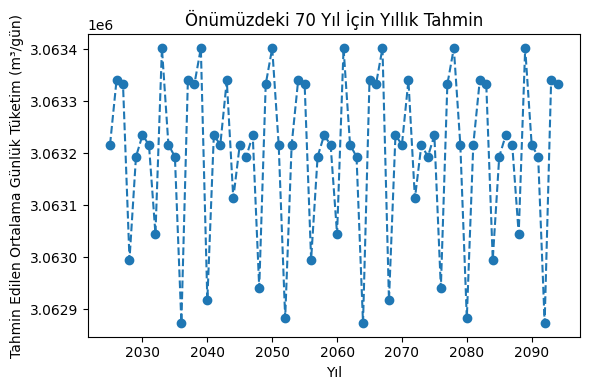

In [72]:

# --- 1) Gelecek tarih aralığını hazırla (örneğin 100 yıl)
start = merged_df['Tarih'].max() + pd.Timedelta(days=1)
end   = start + pd.DateOffset(years=100) - pd.Timedelta(days=1)
future_dates = pd.date_range(start, end, freq='D')
future = pd.DataFrame({'Tarih': future_dates})

# --- 2) Özellik mühendisliği (tarihe dayalı) ---
future['Yıl']       = future['Tarih'].dt.year
future['Ay']        = future['Tarih'].dt.month
future['Gün']       = future['Tarih'].dt.day
future['HaftaGünü'] = future['Tarih'].dt.weekday

# --- 3) Lag & Rolling sütunlarını climatology ile sabitle ---
#    ( geçmiş merged_df üzerinden ortalamaları alıyoruz )
mean_sum_rain = merged_df[dam_names_rainfall].sum(axis=1).mean()
mean_mean_res = merged_df[dam_names_reservoir].mean(axis=1).mean()
mean_roll7_rain  = merged_df[dam_names_rainfall].sum(axis=1).rolling(7).mean().mean()
mean_roll7_res   = merged_df[dam_names_reservoir].mean(axis=1).rolling(7).mean().mean()

for lag in [1,7]:
    future[f'LagYağış_{lag}']   = mean_sum_rain
    future[f'LagDoluluk_{lag}'] = mean_mean_res

future['Roll7_Yağış']   = mean_roll7_rain
future['Roll7_Doluluk'] = mean_roll7_res

# --- 4) Modelden tahmin al ---
feature_cols = ['Yıl','Ay','Gün','HaftaGünü',
                'Roll7_Yağış','Roll7_Doluluk',
                'LagYağış_1','LagYağış_7',
                'LagDoluluk_1','LagDoluluk_7']
X_future = future[feature_cols]
future['Tüketim_Tahmin'] = rf.predict(X_future)  # veya lr.predict

# --- 5) Yıllık ortalama tahminleri al ---
annual_pred = (
    future
    .assign(Yıl=future['Tarih'].dt.year)
    .groupby('Yıl')['Tüketim_Tahmin']
    .mean()
    .reset_index()
)

# --- 6) 10, 50, 100 yıllık grafikler ---
for horizon in [10, 40, 70]:
    last_year = merged_df['Tarih'].dt.year.max()
    yrs = np.arange(last_year+1, last_year+1+horizon)
    df_plot = annual_pred[annual_pred['Yıl'].isin(yrs)]

    plt.figure(figsize=(6,4))
    plt.plot(df_plot['Yıl'], df_plot['Tüketim_Tahmin'], 'o--')
    plt.xlabel('Yıl')
    plt.ylabel('Tahmin Edilen Ortalama Günlük Tüketim (m³/gün)')
    plt.title(f'Önümüzdeki {horizon} Yıl İçin Yıllık Tahmin')
    plt.tight_layout()
    plt.show()


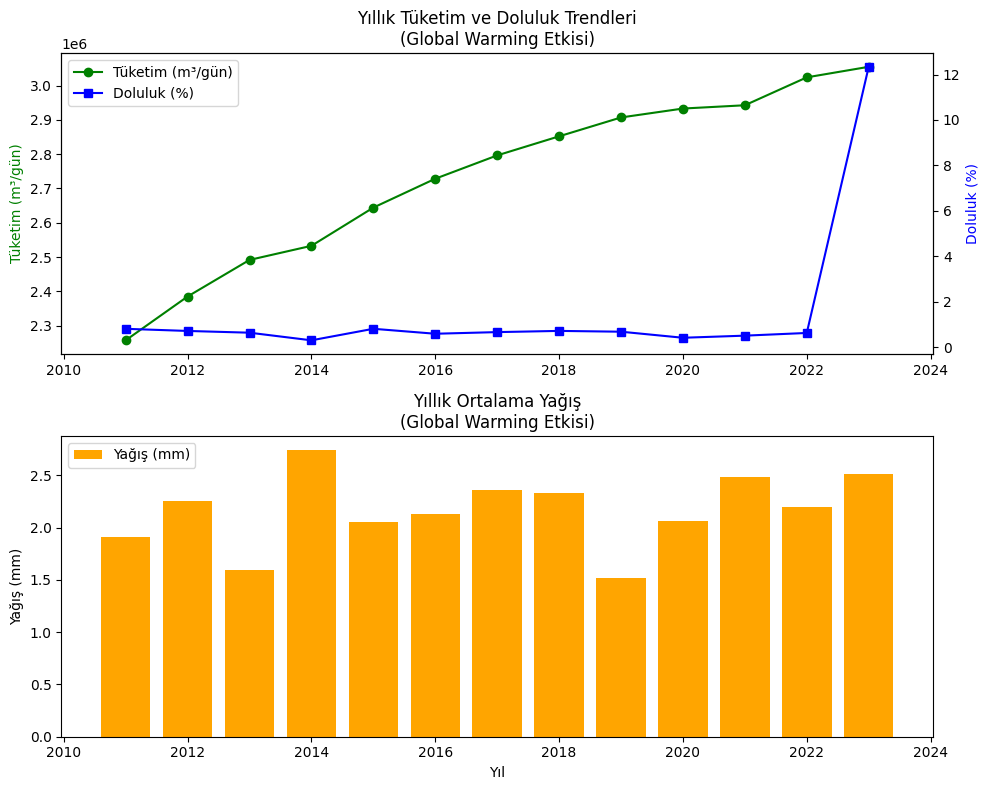

In [73]:
# Yıllık ortalamaları hesapla
# Ne gösterir? - Eğer dolulukta veya yağışta azalma, tüketimde artış var ise, bunun küresel ısınmanın etkisi olabileceğini görsellemiş oluruz.
reservoir_df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/istanbul barajlarının doluluk oranı.xlsx')
rainfall_df  = pd.read_excel('/content/drive/My Drive/Colab Notebooks/istanbul barajlarında yağış ve istanbul günlük tüketim oranı.xlsx')
dams_rain = ['Ömerli (kg/m3)', 'Darlik (kg/m3)', 'Elmali (kg/m3)',
             'Terkos (kg/m3)', 'Alibey (kg/m3)', 'B.çekmece (kg/m3)',
             'Sazlidere (kg/m3)', 'Kazandere (kg/m3)',
             'Pabuçdere (kg/m3)', 'ıstırancalar (kg/m3)']
dams_res  = ['Ömerli', 'Darlık', 'Elmalı', 'Terkos', 'Alibey',
             'Büyükçekmece', 'Sazlıdere', 'Kazandere', 'Pabuçdere', 'Istrancalar']
for df in (reservoir_df, rainfall_df):
    df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')
merged = pd.merge(rainfall_df, reservoir_df, on='Tarih', how='inner')
merged['Yıl']              = merged['Tarih'].dt.year
merged['Ortalama_Doluluk'] = merged[dams_res].mean(axis=1)
merged['Ortalama_Yağış']   = merged[dams_rain].mean(axis=1)
merged['Tüketim']          = merged['İstanbul günlük tüketim(m³/gün)']

# 5) Sadece tam yılları al (>=365 gün)
counts    = merged.groupby('Yıl').size()
full_years= counts[counts >= 365].index
full      = merged[merged['Yıl'].isin(full_years)]

# 6) Yıllık ortalamalar
yearly = (
    full
    .groupby('Yıl')[['Tüketim','Ortalama_Doluluk','Ortalama_Yağış']]
    .mean()
    .reset_index()
)

# 7) Çizimler
fig = plt.figure(figsize=(10, 8))

# 7a) Üst: Tüketim & Doluluk
ax1 = fig.add_subplot(2,1,1)
ax2 = ax1.twinx()
ax1.plot(yearly['Yıl'], yearly['Tüketim'],
         color='green', marker='o', label='Tüketim (m³/gün)')
ax2.plot(yearly['Yıl'], yearly['Ortalama_Doluluk'],
         color='blue',  marker='s', label='Doluluk (%)')

ax1.set_ylabel('Tüketim (m³/gün)', color='green')
ax2.set_ylabel('Doluluk (%)',            color='blue')
ax1.set_title('Yıllık Tüketim ve Doluluk Trendleri\n(Global Warming Etkisi)')

# Ortak legend
l1, l2 = ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()
ax1.legend(l1[0] + l2[0], l1[1] + l2[1], loc='upper left')

# 7b) Alt: Yağış
ax3 = fig.add_subplot(2,1,2, sharex=ax1)
ax3.bar(yearly['Yıl'], yearly['Ortalama_Yağış'],
        color='orange', label='Yağış (mm)')
ax3.set_ylabel('Yağış (mm)')
ax3.set_xlabel('Yıl')
ax3.set_title('Yıllık Ortalama Yağış\n(Global Warming Etkisi)')
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

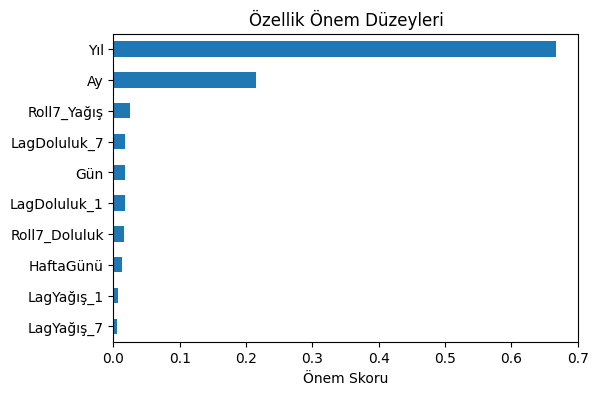

In [74]:
# Modelin “Yıl” Özelliğine Verdiği Önem (Feature Importance)
# Ne gösterir? - “Yıl”ın diğer özelliklere göre görece yüksek öneme sahip olması, modelin küresel ısınma eğilimini gerçekten kullanarak tahmin yaptığına işaret eder.
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=True)

plt.figure(figsize=(6,4))
feat_imp.plot(kind='barh')
plt.title('Özellik Önem Düzeyleri')
plt.xlabel('Önem Skoru')
plt.show()

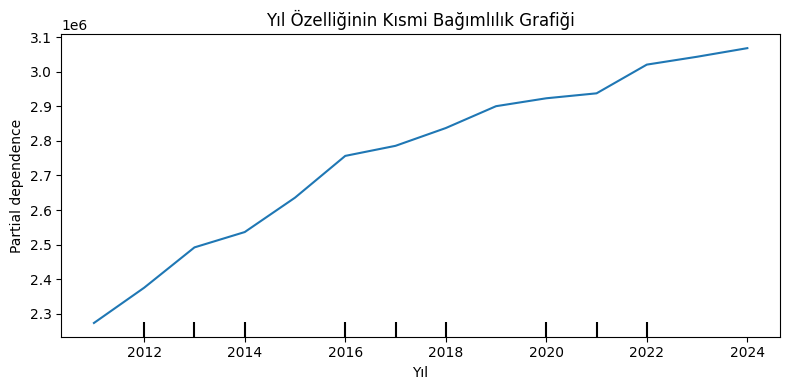

In [75]:
# Yıl’a Göre Kısmi Bağımlılık (Partial Dependence)
# Ne gösterir? – Model “Yıl” arttıkça tahmin edilen tüketimdeki yükseliş/düşüş trendini net olarak görebiliriz.
from sklearn.inspection import PartialDependenceDisplay

# 1) Önce figür boyutunu ayarlayın
fig, ax = plt.subplots(figsize=(8, 4))

# 2) from_estimator'a ax parametresi geçin
disp = PartialDependenceDisplay.from_estimator(
    rf,                 # eğitimli model
    X_train,            # eğitim verisi
    ['Yıl'],            # özellik listesi
    grid_resolution=20, # kaç nokta
    kind='average',     # ortalama bağımlılık
    ax=ax               # grafik çizilecek eksen
)

ax.set_title('Yıl Özelliğinin Kısmi Bağımlılık Grafiği')
ax.set_xlabel('Yıl')
ax.set_ylabel('Tahmin Edilen Tüketim (m³/gün)')
plt.tight_layout()
plt.show()


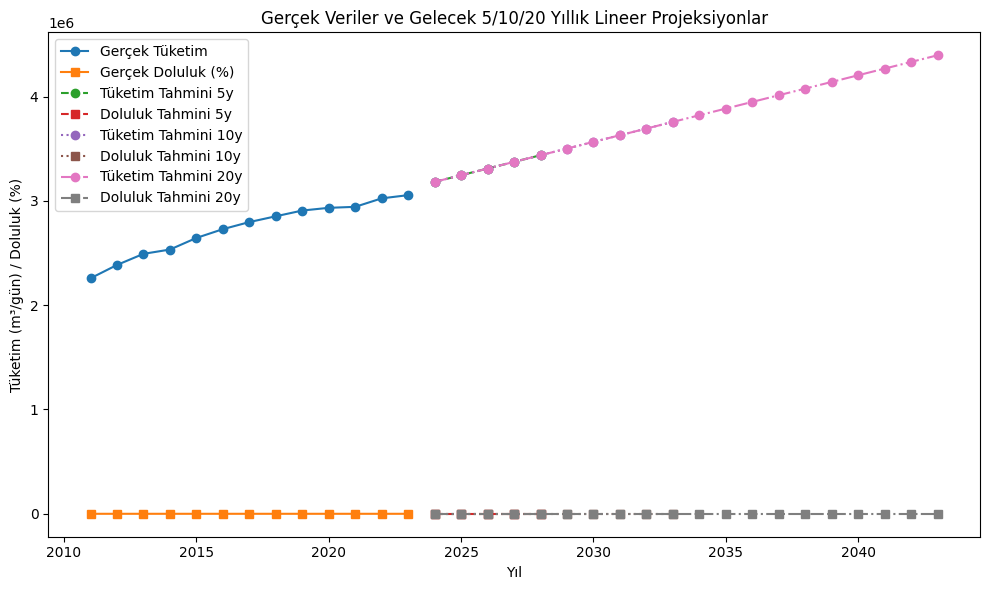

In [76]:
# Lineer projeksiyon, trendin düz devam edeceğini varsayar; hızlıca “eğilim nasıl gider” sorusuna yanıt verir.
from sklearn.linear_model import LinearRegression

# 1) Girdi ve hedefleri hazırla
X_years = yearly['Yıl'].values.reshape(-1,1)   # [[2011],[2012],…]
y_cons = yearly['Tüketim'].values
y_dol  = yearly['Ortalama_Doluluk'].values
y_yag  = yearly['Ortalama_Yağış'].values

# 2) Modelleri fit et
lr_cons = LinearRegression().fit(X_years, y_cons)
lr_dol  = LinearRegression().fit(X_years, y_dol)
lr_yag  = LinearRegression().fit(X_years, y_yag)

# 3) Gelecek yılları tanımla
last_year = yearly['Yıl'].max()
future_yrs5  = np.arange(last_year+1, last_year+6)   # +1…+5
future_yrs10 = np.arange(last_year+1, last_year+11)  # +1…+10
future_yrs20 = np.arange(last_year+1, last_year+21)  # +1…+20

# 4) Tahmin et
pred5_cons  = lr_cons.predict(future_yrs5 .reshape(-1,1))
pred10_cons = lr_cons.predict(future_yrs10.reshape(-1,1))
pred20_cons = lr_cons.predict(future_yrs20.reshape(-1,1))
# aynı şekilde doluluk ve yağış için de:
pred5_dol  = lr_dol.predict(future_yrs5 .reshape(-1,1))
pred10_dol = lr_dol.predict(future_yrs10.reshape(-1,1))
pred20_dol = lr_dol.predict(future_yrs20.reshape(-1,1))

pred5_yag  = lr_yag.predict(future_yrs5 .reshape(-1,1))
pred10_yag = lr_yag.predict(future_yrs10.reshape(-1,1))
pred20_yag = lr_yag.predict(future_yrs20.reshape(-1,1))

# 5) Grafik: geçmiş + projeksiyon (örnek: tüketim + doluluk)
plt.figure(figsize=(10,6))
# Geçmiş
plt.plot(yearly['Yıl'], yearly['Tüketim'], 'o-', label='Gerçek Tüketim')
plt.plot(yearly['Yıl'], yearly['Ortalama_Doluluk'], 's-', label='Gerçek Doluluk (%)')

# 5 yıl sonrası
plt.plot(future_yrs5 , pred5_cons , 'o--', label='Tüketim Tahmini 5y')
plt.plot(future_yrs5 , pred5_dol  , 's--', label='Doluluk Tahmini 5y')

# 10 yıl sonrası
plt.plot(future_yrs10, pred10_cons, 'o:', label='Tüketim Tahmini 10y')
plt.plot(future_yrs10, pred10_dol , 's:', label='Doluluk Tahmini 10y')

# 20 yıl sonrası
plt.plot(future_yrs20, pred20_cons, 'o-.', label='Tüketim Tahmini 20y')
plt.plot(future_yrs20, pred20_dol , 's-.', label='Doluluk Tahmini 20y')

plt.xlabel('Yıl')
plt.ylabel('Tüketim (m³/gün) / Doluluk (%)')
plt.title('Gerçek Veriler ve Gelecek 5/10/20 Yıllık Lineer Projeksiyonlar')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

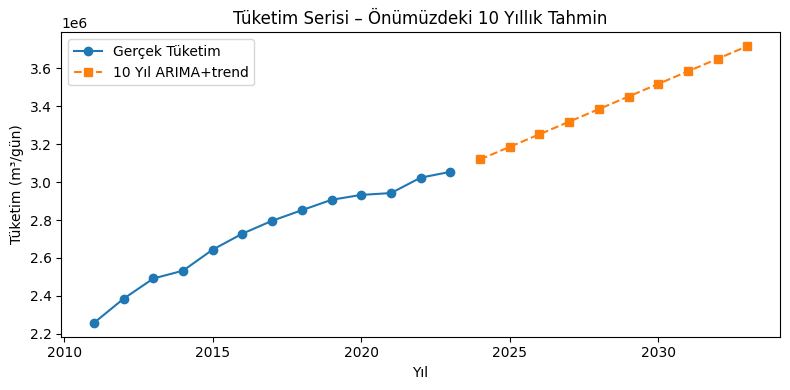

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


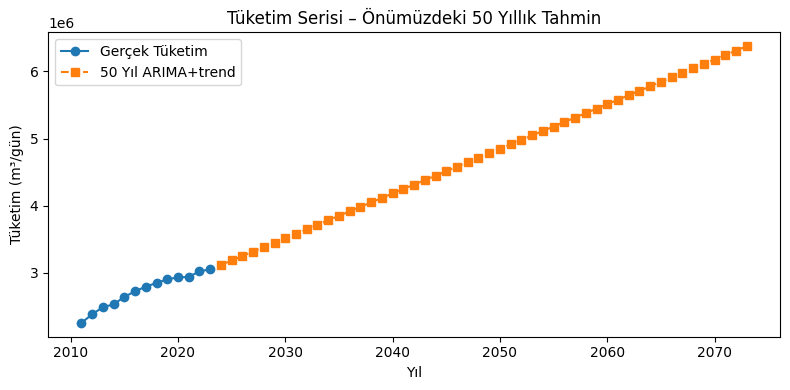

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


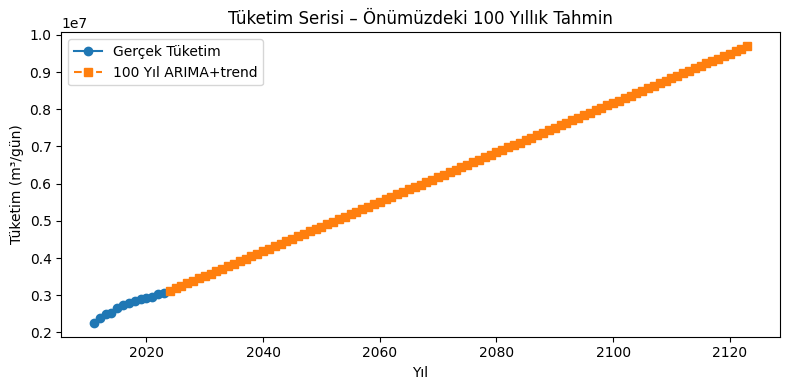

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


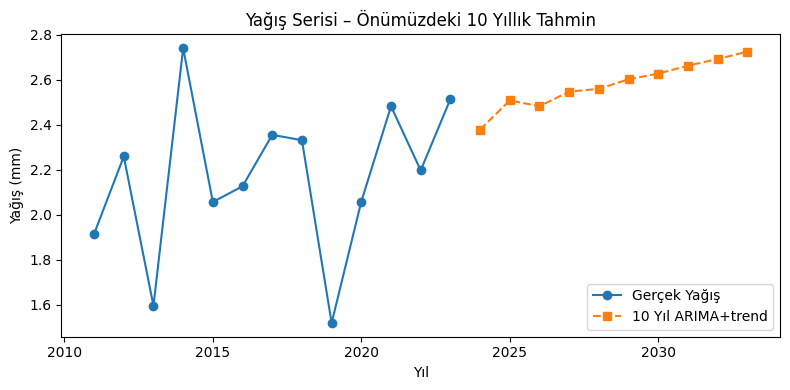

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


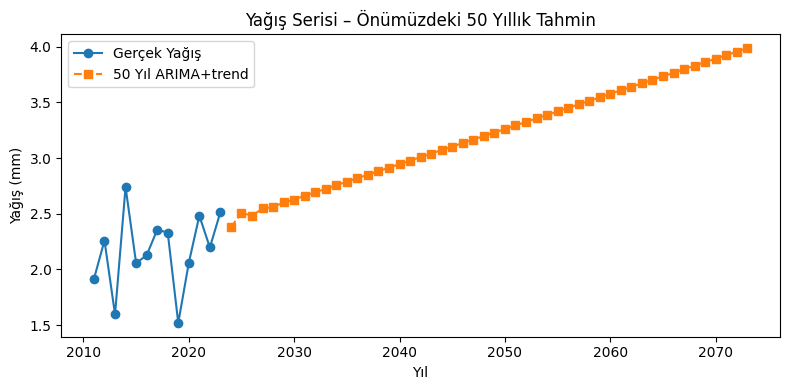

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


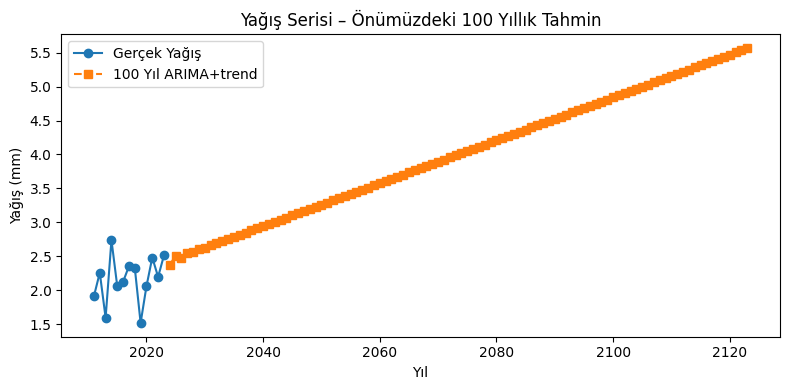

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


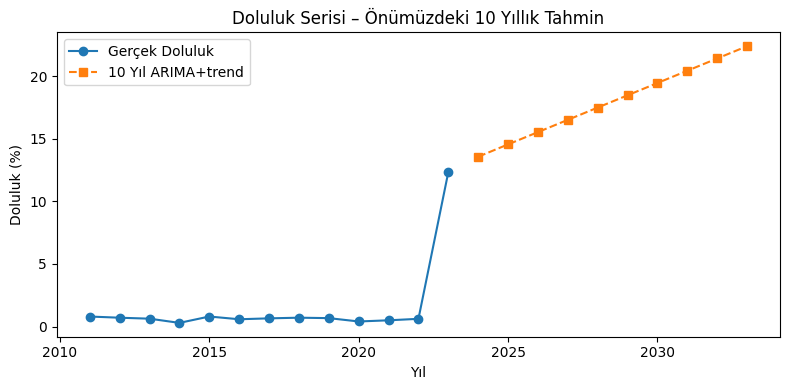

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


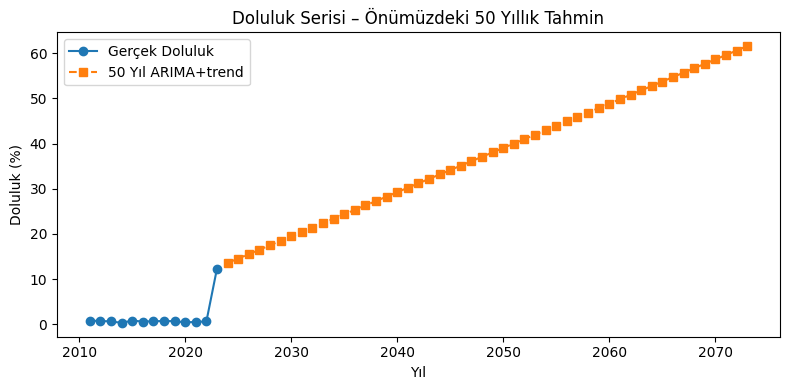

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


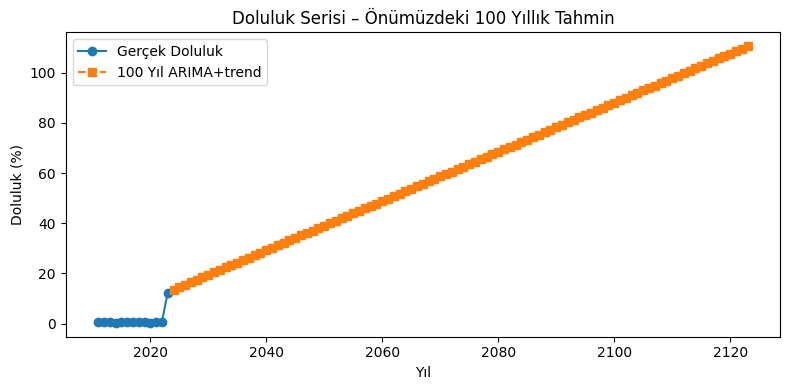

In [77]:
# ARIMA gibi modeller, geçmişten gelen otomatik korelasyonları da kullanarak daha “zaman serisi” odaklı tahminler üretir.
from statsmodels.tsa.arima.model import ARIMA

# --- 1) Zaman serilerini hazırla ---
# 'yearly' DataFrame’inizde aşağıdaki sütunlar olduğunu varsayıyoruz:
#  'Yıl', 'Tüketim', 'Ortalama_Yağış', 'Ortalama_Doluluk'
cons_ts = yearly.set_index('Yıl')['Tüketim']
yag_ts  = yearly.set_index('Yıl')['Ortalama_Yağış']
dol_ts  = yearly.set_index('Yıl')['Ortalama_Doluluk']

# --- 2) Her seri için ARIMA+trend modelini fit et ---
models = {
    'Tüketim': ARIMA(cons_ts, order=(1,1,0), trend='t').fit(),
    'Yağış':   ARIMA(yag_ts,  order=(1,1,0), trend='t').fit(),
    'Doluluk': ARIMA(dol_ts,  order=(1,1,0), trend='t').fit(),
}

last_year = cons_ts.index.max()

def forecast(model, steps):
    fc = model.get_forecast(steps=steps).predicted_mean
    fc.index = np.arange(last_year+1, last_year+1+steps)
    return fc

# --- 3) 10, 50, 100 yıllık tahminleri ayrı grafikte çiz ---
horizons = [10, 50, 100]
for name, model in models.items():
    # hangi y-ekseni etiketi kullanılacak?
    ylabel = {
        'Tüketim': 'Tüketim (m³/gün)',
        'Yağış':   'Yağış (mm)',
        'Doluluk': 'Doluluk (%)'
    }[name]
    # gerçek seri
    ts = {'Tüketim':cons_ts, 'Yağış':yag_ts, 'Doluluk':dol_ts}[name]

    for h in horizons:
        fc = forecast(model, h)
        plt.figure(figsize=(8,4))
        plt.plot(ts.index, ts, 'o-', label=f'Gerçek {name}')
        plt.plot(fc.index, fc, 's--', label=f'{h} Yıl ARIMA+trend')
        plt.title(f'{name} Serisi – Önümüzdeki {h} Yıllık Tahmin')
        plt.xlabel('Yıl')
        plt.ylabel(ylabel)
        plt.legend()
        plt.tight_layout()
        plt.show()

